# Imports

In [262]:
!pip install -r requirements.txt


In [263]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [264]:
#Dataset import
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Dataset

In [265]:
#Show train dataset
train

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0,75.0,1,203,1,38,1,283000.00,0.60,131,1,1,74
1,0,79.0,1,55,0,50,1,172000.00,1.80,133,1,0,78
2,0,45.0,1,1876,1,35,0,226000.00,0.90,138,1,0,88
3,0,67.0,0,582,0,50,0,263358.03,1.18,137,1,1,76
4,0,80.0,0,898,0,25,0,149000.00,1.10,144,1,1,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0,45.0,0,582,1,38,0,302000.00,0.90,140,0,0,244
187,0,62.0,0,30,1,60,1,244000.00,0.90,139,1,0,117
188,0,53.0,0,56,0,50,0,308000.00,0.70,135,1,1,231
189,0,63.0,1,103,1,35,0,179000.00,0.90,136,1,1,270


In [266]:
#Show test dataset
test

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0,60.0,0,59,0,25,1,212000.00,3.50,136,1,1,187
1,0,70.0,0,618,0,35,0,327000.00,1.10,142,0,0,245
2,0,73.0,1,1185,0,40,1,220000.00,0.90,141,0,0,213
3,0,60.0,0,2261,0,35,1,228000.00,0.90,136,1,0,115
4,0,65.0,1,305,0,25,0,298000.00,1.10,141,1,0,87
5,0,58.0,0,144,1,38,1,327000.00,0.70,142,0,0,83
6,1,80.0,0,776,1,38,1,192000.00,1.30,135,0,0,130
7,1,68.0,1,220,0,35,1,289000.00,0.90,140,1,1,20
8,0,68.0,1,157,1,60,0,208000.00,1.00,140,0,0,237
9,1,80.0,1,553,0,20,1,140000.00,4.40,133,1,0,41


**VERIFICA DI ELEMENTI NULLI NEL DATASET**

In [267]:
#Checking missing values on train + test set
def get_cols_with_missing(train, test):
    
    return {
        col: (train[col].isnull().sum() + test[col].isnull().sum())
        for col in train.columns
        if train[col].isnull().any() or test[col].isnull().any()
    }

get_cols_with_missing(train, test)

{}

Non ci sono campi vuoti sia nel train che nel test set perciò abbiamo possibilità di effettuare una predizione più accurata.

**VERIFICA D EL TIPO DEI CAMPI NEL TRAINING SET**

In [268]:
#Verify Dtype
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DEATH_EVENT               191 non-null    int64  
 1   age                       191 non-null    float64
 2   anaemia                   191 non-null    int64  
 3   creatinine_phosphokinase  191 non-null    int64  
 4   diabetes                  191 non-null    int64  
 5   ejection_fraction         191 non-null    int64  
 6   high_blood_pressure       191 non-null    int64  
 7   platelets                 191 non-null    float64
 8   serum_creatinine          191 non-null    float64
 9   serum_sodium              191 non-null    int64  
 10  sex                       191 non-null    int64  
 11  smoking                   191 non-null    int64  
 12  time                      191 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 19.5 KB


Avendo solo dati numerici non effettuiamo alcun label encoding.

# Correlazione del training set

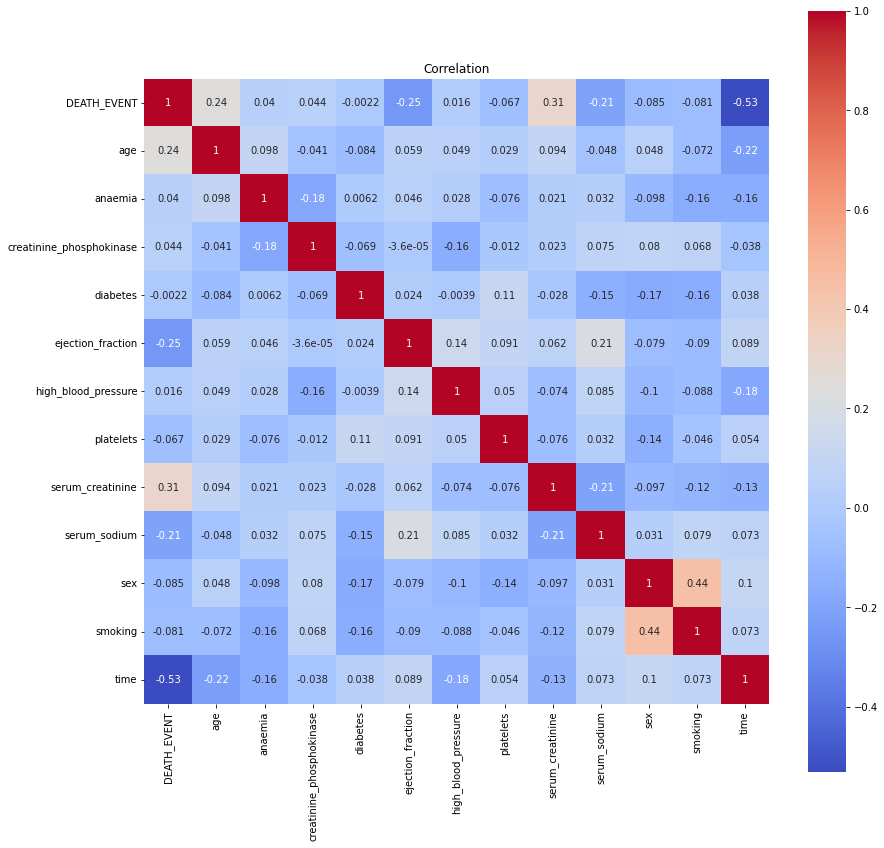

In [269]:
#Correlation Graphic on training set
correlation = train.corr()
plt.figure(figsize=(14,14))
sns.heatmap(correlation, vmax=1,  cmap='coolwarm', square=True,annot=True)
plt.title('Correlation')
plt.show()

Da una analisi preliminare del grafico osserviamo livelli di correllazione notevoli per diverse feature con quella che ci interessa predire, andremo ad analizzarle meglio in seguito.
Salta all'occhio la forte correlazione tra le feature "smoking" e "sex". 

# Analisi delle features

**DISTRIBUZIONE DELLA FEATURE "DEATH_EVENT" (VARIABILE DA PREDIRE)**


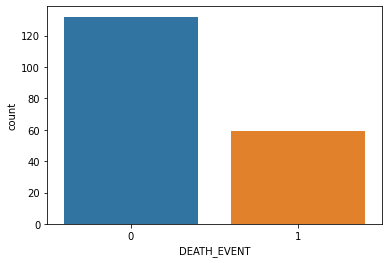

In [270]:
#Data distribution based on 'DEATH_EVENT' label
sns.countplot(x = 'DEATH_EVENT', data = train)
plt.show();

Circa un paziente su tre tra quelli del training set muore durante il periodo di osservazione.

**ANALISI DELLE FEATURE "anaemia", "diabetes", "high_pressure_blood"**


Iniziamo analizzando la distribuzione rispetto alla feature da predire dei pazienti anemici, diabetici e con la pressione sanguigna alta. Partiamo da queste feature perchè hanno dei bassi livelli di correlazione con "DEATH_EVENT".

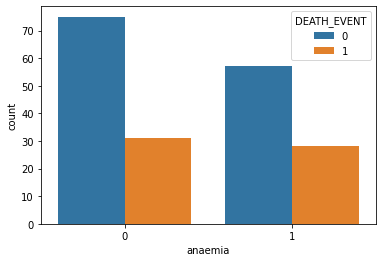

In [271]:
sns.countplot(x = train["anaemia"], hue="DEATH_EVENT", data = train)
plt.show()

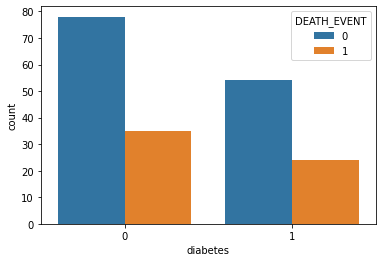

In [272]:
sns.countplot(x = train["diabetes"], hue="DEATH_EVENT", data = train)
plt.show()

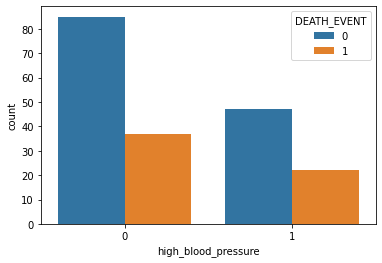

In [273]:
sns.countplot(x = train["high_blood_pressure"], hue="DEATH_EVENT", data = train)
plt.show()

I tre grafici ci mostrano che non vi è nessun particolare trend che lega una di queste patologie alla variabile da predire il che è coerente con i bassi livelli di correlazione riscontrati pertanto facciamo la scelta di escludere tali feature dal dataset in ottica di ottenere una accuracy più elevata.

In [274]:
#Dropping features in training set
train = train.drop('anaemia', axis=1)
train = train.drop('diabetes', axis=1)
train = train.drop('high_blood_pressure', axis=1)

#Dropping features in test set
test = test.drop('anaemia', axis=1)
test = test.drop('diabetes', axis=1)
test = test.drop('high_blood_pressure', axis=1)

**ANALISI DELLE FEATURE "sex", "smoking"**

Queste due feature meritano particolare attenzione non per l'alta correlazione che hanno con la variabile da predire bensì perchè sono correlate tra loro, iniziamo vedendo la loro distribuzione.

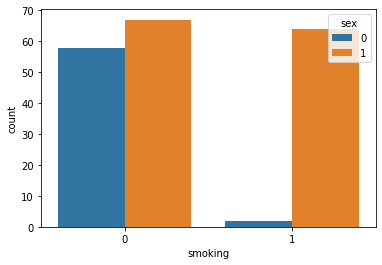

In [275]:
sns.countplot(x = train["smoking"], hue="sex", data = train)
plt.show()

Risulta evidente che tra i pazienti presi in esame i fumatori sono quasi tutti dello stesso sesso mentre i non fumatori sono equamente distribuiti. Si potrebbe pensare di fare un merge delle due feature ma visti i bassi livelli di correlazione con la feature da predire non otterremmo risultati concreti pertanto scartiamo l'idea.
E' importante sottolineare che la feature "smoking" clinicamente dovrebbe avere una alta correlazione con "DEATH_EVENT" e pertanto influire molto sull'esito della previsione ma non è questo il caso. Possiamo presumere che tale situazione sia conseguenza della dimensione limitata del dataset pertanto scartiamo solo la feature "sex".

In [276]:
#Dropping features in training set
train = train.drop('sex', axis=1)

#Dropping features in test set
test = test.drop('sex', axis=1)

**ANALISI DELLE FEATURE "platelets", "creatinine_phosphokinase"**

Sono le ultime due feature a bassa correlazione di cui ci occupiamo, effettuiamo un binning per vedere se è possibile ottenere livelli di correlazione significativi.

In [277]:
#Feature division per "platelets"
train['plateletsBand'] = pd.cut(train['platelets'], 5)
train[['plateletsBand', 'DEATH_EVENT']].groupby(['plateletsBand'], as_index=False).mean().sort_values(by='plateletsBand', ascending=True)

,plateletsBand,DEATH_EVENT
0,"(46305.0, 186000.0]",0.314286
1,"(186000.0, 325000.0]",0.316667
2,"(325000.0, 464000.0]",0.310345
3,"(464000.0, 603000.0]",0.166667
4,"(603000.0, 742000.0]",0.000000


In [278]:
#Value assignment
train.loc[(train['platelets'] > 46305.0) & (train['platelets'] <=  186000.0), 'platelets'] = 0
train.loc[(train['platelets'] > 186000.0) & (train['platelets'] <=  325000.0), 'platelets'] = 1
train.loc[(train['platelets'] >  325000.0) & (train['platelets'] <= 464000.0), 'platelets'] = 2
train.loc[(train['platelets'] > 464000.0) & (train['platelets'] <= 603000.0), 'platelets'] = 3
train.loc[(train['platelets'] > 603000.0) & (train['platelets'] <= 742000.0), 'platelets'] = 4

test.loc[(test['platelets'] > 46305.0) & (test['platelets'] <=  186000.0), 'platelets'] = 0
test.loc[(test['platelets'] > 186000.0) & (test['platelets'] <=  325000.0), 'platelets'] = 1
test.loc[(test['platelets'] >  325000.0) & (test['platelets'] <= 464000.0), 'platelets'] = 2
test.loc[(test['platelets'] > 464000.0) & (test['platelets'] <= 603000.0), 'platelets'] = 3
test.loc[(test['platelets'] > 603000.0) & (test['platelets'] <= 742000.0), 'platelets'] = 4

train = train.drop("plateletsBand", axis = 1)

#Check
train.platelets.unique()

array([1., 0., 2., 3., 4.])

In [279]:
#Feature division per "creatinine_phosphokinaseBand"
train['creatinine_phosphokinaseBand'] = pd.cut(train['creatinine_phosphokinase'], 4)
train[['creatinine_phosphokinaseBand', 'DEATH_EVENT']].groupby(['creatinine_phosphokinaseBand'], as_index=False).mean().sort_values(by='creatinine_phosphokinaseBand', ascending=True)

,creatinine_phosphokinaseBand,DEATH_EVENT
0,"(22.169, 1987.75]",0.303371
1,"(1987.75, 3945.5]",0.285714
2,"(3945.5, 5903.25]",0.400000
3,"(5903.25, 7861.0]",1.000000


In [280]:
#Value assignment
train.loc[(train['creatinine_phosphokinase'] > 22.169) & (train['creatinine_phosphokinase'] <=  1987.75), 'creatinine_phosphokinase'] = 0
train.loc[(train['creatinine_phosphokinase'] > 1987.75) & (train['creatinine_phosphokinase'] <=  3945.5), 'creatinine_phosphokinase'] = 1
train.loc[(train['creatinine_phosphokinase'] >  3945.5) & (train['creatinine_phosphokinase'] <= 5903.25), 'creatinine_phosphokinase'] = 2
train.loc[(train['creatinine_phosphokinase'] > 5903.25) & (train['creatinine_phosphokinase'] <= 7861.0), 'creatinine_phosphokinase'] = 3

test.loc[(test['creatinine_phosphokinase'] > 22.169) & (test['creatinine_phosphokinase'] <=  1987.75), 'creatinine_phosphokinase'] = 0
test.loc[(test['creatinine_phosphokinase'] > 1987.75) & (test['creatinine_phosphokinase'] <=  3945.5), 'creatinine_phosphokinase'] = 1
test.loc[(test['creatinine_phosphokinase'] >  3945.5) & (test['creatinine_phosphokinase'] <= 5903.25), 'creatinine_phosphokinase'] = 2
test.loc[(test['creatinine_phosphokinase'] > 5903.25) & (test['creatinine_phosphokinase'] <= 7861.0), 'creatinine_phosphokinase'] = 3

train = train.drop("creatinine_phosphokinaseBand", axis = 1)

#Check
train.creatinine_phosphokinase.unique()

array([0, 2, 3, 1])

Rianalizziamo il grafico di correlazione:

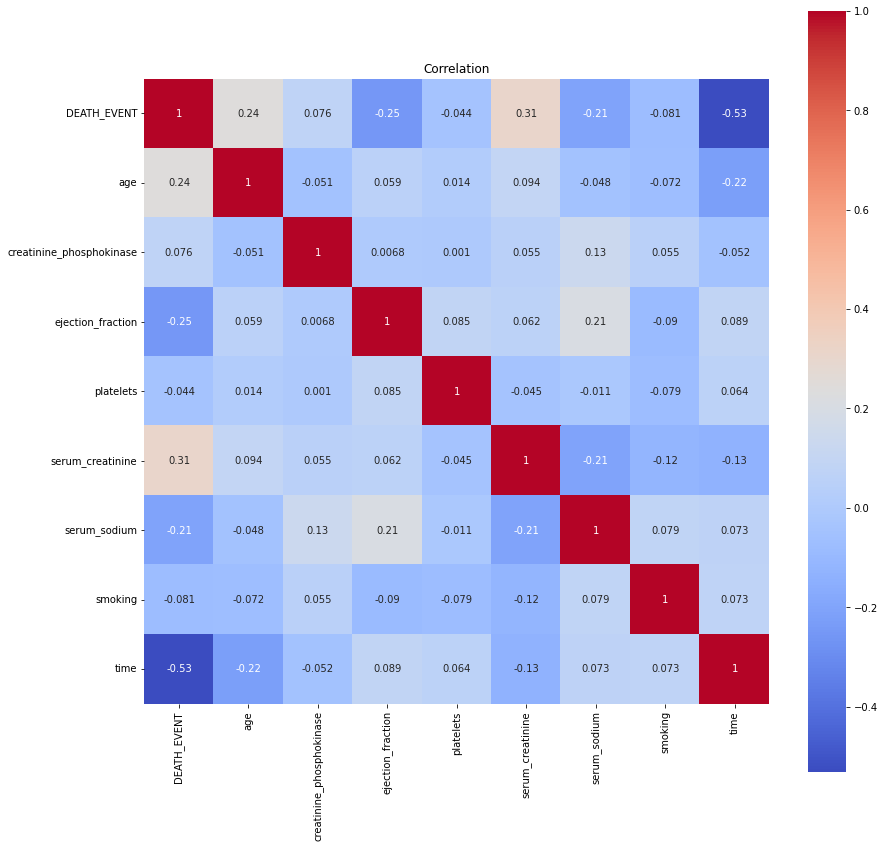

In [281]:
#Correlation Graphic on training set
correlation = train.corr()
plt.figure(figsize=(14,14))
sns.heatmap(correlation, vmax=1,  cmap='coolwarm', square=True,annot=True)
plt.title('Correlation')
plt.show()

I risultati ottenuti sono incoraggianti per la feature "creatinine_phosphokinase" perciò scartiamo solo la feature "platelets".

In [282]:
#Dropping features in training set
train = train.drop('platelets', axis=1)

#Dropping features in test set
test = test.drop('platelets', axis=1)

**ANALISI DELLE FEATURE AD ALTA CORRELAZIONE**


**Feature "age"**

Vediamo ora la distribuzione dell'età dei pazienti rispetto  alla feature da predire.

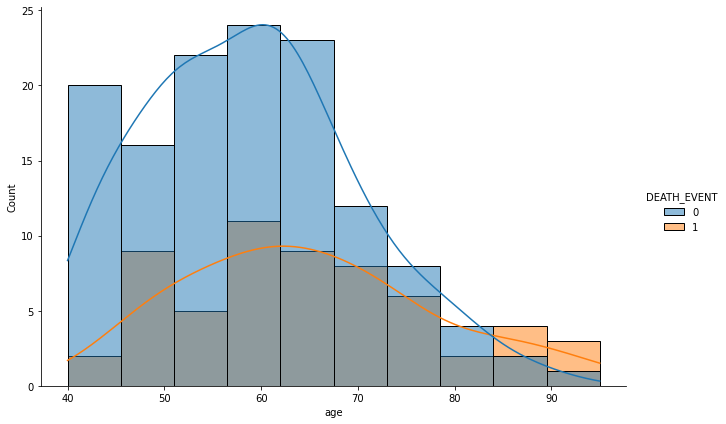

In [283]:
#Visualizzazione distribuzione età dei pazienti
sns.displot(data=train, x="age", hue="DEATH_EVENT",  height=6, aspect=1.5, kde = True)
plt.show()

Come era prevedibile aspettarsi i soggetti più anziani sono quelli più a rischio di attacco cardiaco tanto che superata una certa soglia  di età i casi  dei pazienti morti durante l'osservazione superano il numero dei vivi.


**Feature "time"**

Vediamo fino a che punto la durata dell'osservazione influisce sull'esito della stessa.

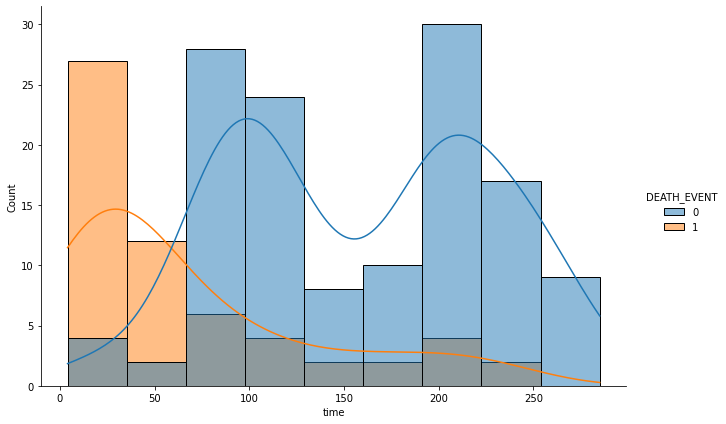

In [284]:
#Visualizzazione distribuzione durata dell'osservazione
sns.displot(data=train, x="time", hue="DEATH_EVENT",  height=6, aspect=1.5, kde = True)
plt.show()

La grande maggioranza dei decessi avviene all'inizio del periodo di osservazione mentre dopo una certa quantità di tempo il rischio di dipartita crolla.

**Analisi delle feature cliniche: "ejection_fraction", "serum_creatinine", "serum sodium"**

Analizziamo la distribuzione di queste ultime feature rispetto  alla variabile da predire.

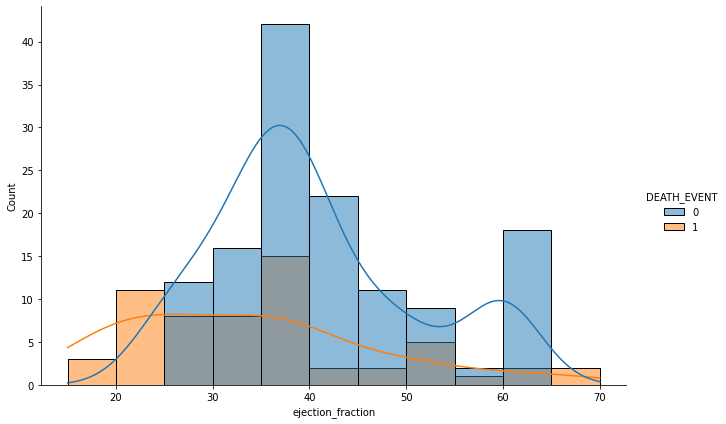

In [285]:
#Visualizzazione ejection_fraction
sns.displot(data=train, x="ejection_fraction", hue="DEATH_EVENT",  height=6, aspect=1.5, kde = True)
plt.show()

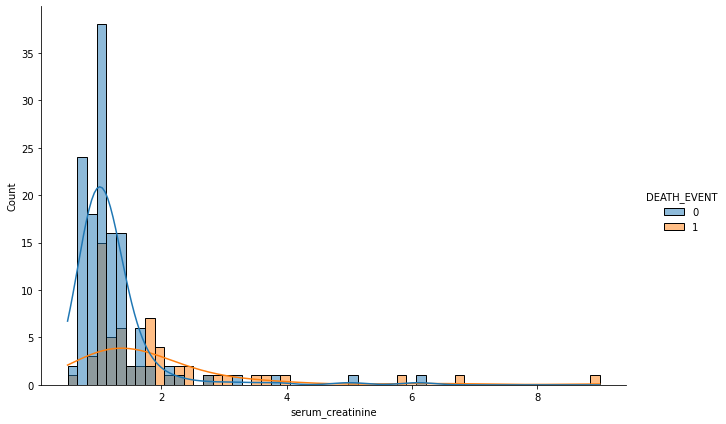

In [286]:
#Visualizzazione serum_creatinine
sns.displot(data=train, x="serum_creatinine", hue="DEATH_EVENT",  height=6, aspect=1.5, kde = True)
plt.show()

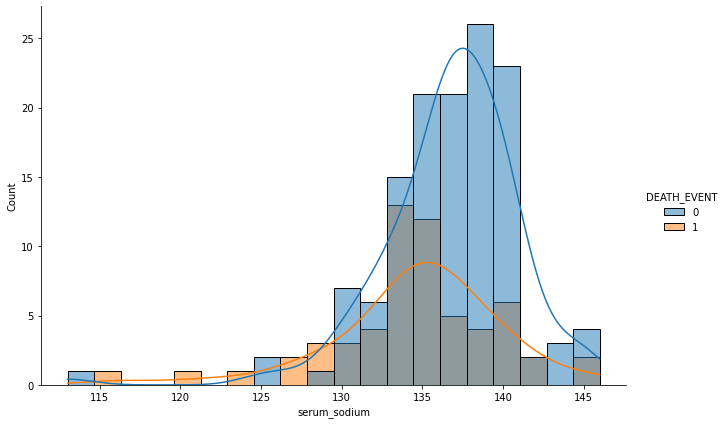

In [287]:
#Visualizzazione serum_sodium
sns.displot(data=train, x="serum_sodium", hue="DEATH_EVENT",  height=6, aspect=1.5, kde = True)
plt.show()

Per tutte e tre le feature registriamo dei valori critici che comportano la certa o quasi certa morte del paziente durante il periodo di osservazione.

# Previsione

E' importante sottolineare che la dimensione ridotta del dataset potrebbe incidere negativamente sulla qualità del modello.

Divido la label "DEATH_EVENT" dal training set e test set per applicare l'algoritmo di ML.

In [288]:
#Divide
trainY=train['DEATH_EVENT']
testY=test['DEATH_EVENT']
trainX=train.drop('DEATH_EVENT', axis=1)
testX=test.drop('DEATH_EVENT', axis=1)

Applico il modello RandomForestClassifier che calcola una moltitudine di Decision Trees e tramite la media dei risultati ottenuti fa la previsione.

In [289]:
#Model training and score
forest = RandomForestClassifier()
forest.fit(trainX, trainY)
prediction = forest.predict(testX)
print('Accuracy:',(accuracy_score(testY, prediction)* 100), "%")

Accuracy: 91.66666666666666 %


**Analisi della previsione**

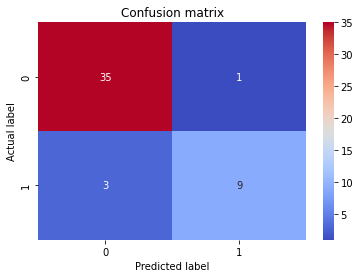

In [290]:
#Confusion Matrix
predY = forest.predict(testX)

cnf_matrix = metrics.confusion_matrix(testY, predY)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

Dalla matrice di confusione possiamo osservare che la maggiore percentuale degli errori sono  falsi negativi.